# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [ ]:
!pip install smolagents

Let's also login to the Hugging Face Hub to have access to the Inference API.

In [2]:
from huggingface_hub import notebook_login

notebook_login()

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [6]:
from smolagents import CodeAgent, HfApiModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model = HfApiModel(
    max_tokens=2096,
    #temperature=0.5,
    model_id='https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/',
    custom_role_conversions=None,
))


# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ HfApiModel - https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/ ──────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 2.04 seconds| Input tokens: 2,077 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 2: Duration 1.58 seconds| Input tokens: 4,324 | Output tokens: 116]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [7]:
from smolagents import Tool, CodeAgent, HfApiModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model = HfApiModel(
    max_tokens=2096,
    #temperature=0.5,
    model_id='https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/',
    custom_role_conversions=None,
))

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ HfApiModel - https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/ ──────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme = superhero_party_theme_generator(category="villain masquerade")                                           
  print(theme)                                                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 1.97 seconds| Input tokens: 2,113 | Output tokens: 62]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme = "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains."            
  final_answer(theme)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 2: Duration 2.56 seconds| Input tokens: 4,394 | Output tokens: 147]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [22]:
from google.colab import userdata
HUGGINGFACEHUB_API_TOKEN=userdata.get('HUGGINGFACEHUB_API_TOKEN')
party_theme_tool.push_to_hub("ZoheirB/catering_service_tool",token=HUGGINGFACEHUB_API_TOKEN)

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/ZoheirB/catering_service_tool/commit/f65114d34751db3c54fa8e24a9c619e2a1666bba', commit_message='Upload tool', commit_description='', oid='f65114d34751db3c54fa8e24a9c619e2a1666bba', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/ZoheirB/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='ZoheirB/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

In [13]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model = HfApiModel(
    max_tokens=2096,
    #temperature=0.5,
    model_id='https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/',
    custom_role_conversions=None,
))

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ HfApiModel - https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/ ──────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor, high-res, photorealistic. The invitation-only       
  event features top-tier superheroes with unique, made-up powers and costumes. The scene is filled with opulent   
  decorations, vintage bat motifs, and elegant guests enjoying themselves. Make sure to include a few iconic       
  Batman touches like the Bat-Signal in the background, luxurious chandeliers, and rich textures."                 
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(prompt=prompt)' due to: HfHubHTTPError: 402 Client Error: 
Payment Required for url: https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-schnell (Request ID:
Root=1-67d94174-0f21045a43ec05a931de1063;83810424-5f06-47a9-9e57-077f621d3720)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 1: Duration 4.55 seconds| Input tokens: 2,107 | Output tokens: 149]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "Luxurious superhero-themed party at Wayne Manor, photorealistic, high-res. Made-up superheroes,        
  elegant guests, opulent decorations, Bat-Signal, chandeliers, rich textures."                                    
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(prompt=prompt)' due to: HfHubHTTPError: 402 Client Error: 
Payment Required for url: https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-schnell (Request ID:
Root=1-67d94177-1a9439045736d6116104cc90;4de3027f-1bca-4c8f-8b3e-d1bb1849fca0)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 2: Duration 3.16 seconds| Input tokens: 4,701 | Output tokens: 252]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "Luxurious superhero party at Wayne Manor, photorealistic. Made-up superheroes, elegant guests,         
  opulent decorations."                                                                                            
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(prompt=prompt)' due to: HfHubHTTPError: 402 Client Error: 
Payment Required for url: https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-schnell (Request ID:
Root=1-67d9417a-0a55fcbe616f3b8b2bc748c8;967c16bc-2713-42df-bf45-6c91672285b1)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 3: Duration 2.64 seconds| Input tokens: 7,691 | Output tokens: 336]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "superhero party at Wayne Manor, photorealistic, opulent decorations"                                   
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(prompt=prompt)' due to: HfHubHTTPError: 402 Client Error: 
Payment Required for url: https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-schnell (Request ID:
Root=1-67d9417c-3d72bd6f3059e893496548de;0466a8a9-c95f-4253-87e9-623bce089494)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 4: Duration 2.48 seconds| Input tokens: 11,043 | Output tokens: 414]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  description = "A luxurious superhero-themed party at Wayne Manor with made-up superheroes, elegant guests, and   
  opulent decorations. The scene is photorealistic, with rich textures, opulent chandeliers, and vintage bat       
  motifs. The Bat-Signal can be seen in the background, adding a unique touch to the event. The superheroes are    
  dressed in unique, custom-made costumes, and the guests are enjoying themselves in this extravagant setting."    
  final_answer(description)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: A luxurious superhero-themed party at Wayne Manor with made-up superheroes, elegant guests, and
opulent decorations. The scene is photorealistic, with rich textures, opulent chandeliers, and vintage bat motifs. 
The Bat-Signal can be seen in the background, adding a unique touch to the event. The superheroes are dressed in 
unique, custom-made costumes, and the guests are enjoying themselves in this extravagant setting.

[Step 5: Duration 8.10 seconds| Input tokens: 14,745 | Output tokens: 697]

'A luxurious superhero-themed party at Wayne Manor with made-up superheroes, elegant guests, and opulent decorations. The scene is photorealistic, with rich textures, opulent chandeliers, and vintage bat motifs. The Bat-Signal can be seen in the background, adding a unique touch to the event. The superheroes are dressed in unique, custom-made costumes, and the guests are enjoying themselves in this extravagant setting.'

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [ ]:
!pip install gradio_client

In [16]:
from smolagents import CodeAgent, HfApiModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel(
    max_tokens=2096,
    #temperature=0.5,
    model_id='https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/',
    custom_role_conversions=None,
)

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ HfApiModel - https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/ ──────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = "A grand superhero-themed party at Wayne Manor, with an extravagant setting including          
  intricate decor, floating banners with superhero symbols, and elegant red and blue lighting. Alfred Pennyworth   
  oversees a luxurious gala, standing proudly in a suit, ensuring everything runs smoothly. The room is filled     
  with MASK guests, all dressed in their finest superhero-themed attire, enjoying delicious food and drinks while  
  admiring the opulence of the mansion."                                                                           
                                                                                                                   
  # Printing the improved prompt to verify                                                                         
  print(improved_prompt)                                                                                           
                                                                                                                   
  # Generating the image                                                                                           
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A grand superhero-themed party at Wayne Manor, with an extravagant setting including intricate decor, floating 
banners with superhero symbols, and elegant red and blue lighting. Alfred Pennyworth oversees a luxurious gala, 
standing proudly in a suit, ensuring everything runs smoothly. The room is filled with MASK guests, all dressed in 
their finest superhero-themed attire, enjoying delicious food and drinks while admiring the opulence of the 
mansion.

Out - Final answer: /tmp/gradio/667e056831c937e4db318038e959880764bcc86991aafab4e158d0b6c3e9df19/image.webp

[Step 1: Duration 11.98 seconds| Input tokens: 2,104 | Output tokens: 181]

'/tmp/gradio/667e056831c937e4db318038e959880764bcc86991aafab4e158d0b6c3e9df19/image.webp'

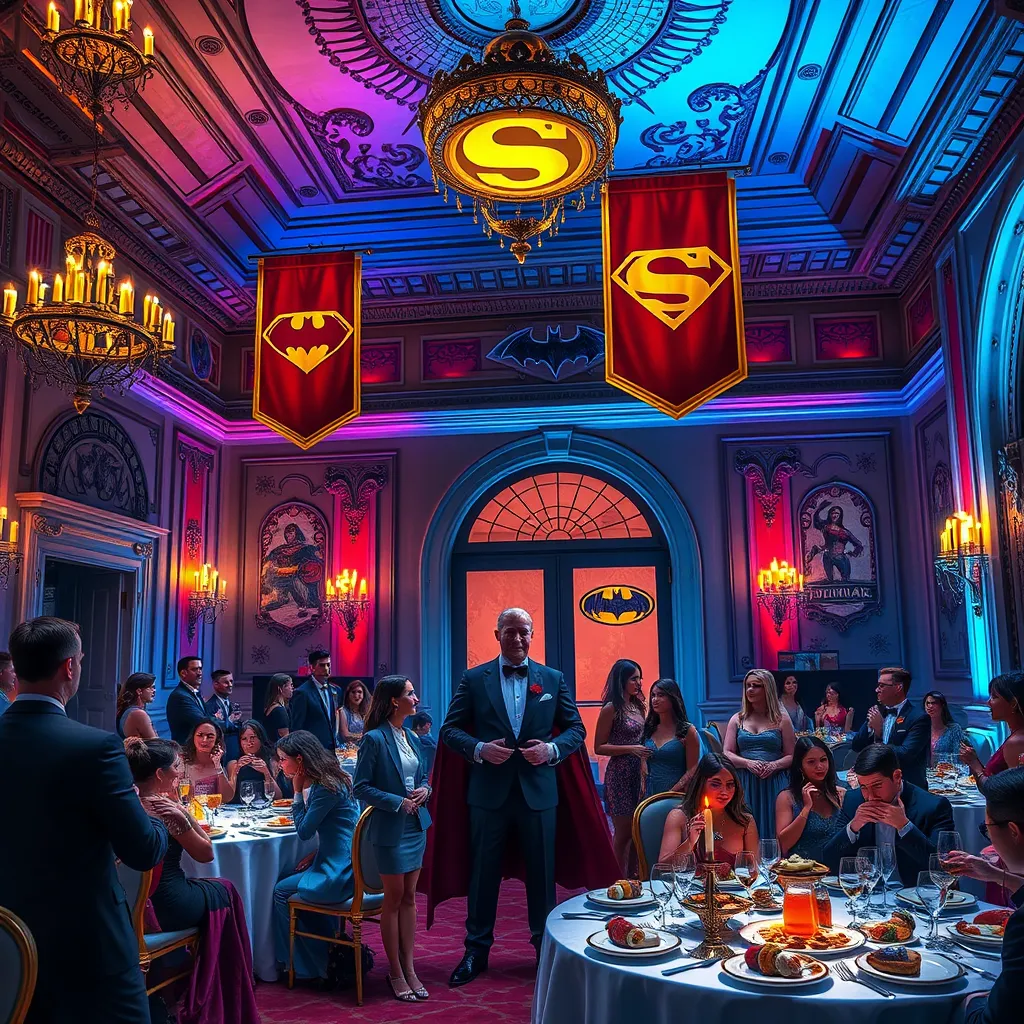

In [18]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/667e056831c937e4db318038e959880764bcc86991aafab4e158d0b6c3e9df19/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [ ]:
!pip install langchain-community google-search-results

In [24]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [25]:
from langchain.agents import load_tools
from smolagents import CodeAgent, HfApiModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ HfApiModel - https://pflgm2locj2t89co.us-east-1.aws.endpoints.huggingface.cloud/ ──────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  entertainment_ideas = search(tool_input="luxury entertainment ideas for superhero-themed event live              
  performances interactive experiences")                                                                           
  print(entertainment_ideas)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: related_questions.', "Here's a look at different ideas for adding cartoon-like visuals and 
references to caped crusaders at your next affair.", 'Ready to explore some of the most in-demand superhero party 
ideas? Below you can find a few of the most popular characters for heroes and villains parties.', 'This tool 
suggests creative superhero-themed party ideas based on a category. It returns a unique party theme idea.""" inputs
= {', 'Interactive Entertainment. Engage in action-packed activities, thrilling photo ops, and dynamic performances
that bring superhero stories to life. Versatile ...', 'Explore 29 conference entertainment ideas to boost 
engagement, build connections, and create memorable experiences.', "We've prepared a list of 30 corporate party 
ideas – from theme-based parties to interactive team-building activities.", '... luxury entertainment ideas for a 
superhero-themed event, such as live performances and interactive experiences.") With this setup, Alfred can 
quickly ...', "We've compiled a list of 75 cool post-Covid event themes, where we're sure you will find the most 
epic theme for your next party.", "Here's a complete guide to event theme ideas, their importance, and how 
integrating them with event technology can enhance your event!", '15 Engaging Ways to Celebrate Client 
Relationships · 1. VIP or Luxury Events · 2. Family Fun · 3. Special Access Sales Events. Activities and ...']

Out: None

[Step 1: Duration 4.87 seconds| Input tokens: 2,082 | Output tokens: 66]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = search(tool_input="luxury entertainment for superhero-themed event live             
  performances interactive experiences")                                                                           
  print(luxury_entertainment_ideas)                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: related_questions.', 'Transform your event into an action-packed superhero party with our dynamic 
decorations, thrilling activities, and themed treats.', 'Hip produced this spectacular, absolutely custom corporate
holiday theme event with Marvel, Wonder Woman, Spiderman, Superman iconic Super Heroes.', 'MARVEL ORIGINS. Brush up
on the Marvel Universe during this eye-opening, interactive Super Hero session. · FAMILY TRIVIA. A battle of wits! 
· ANIMATION ACADEMY.', 'Engage in action-packed activities, thrilling photo ops, and dynamic performances that 
bring superhero stories to life. Versatile Appearances. Perfect for ...', 'A Marvel-themed family day is the 
perfect way to infuse energy, excitement, and camaraderie into your corporate event.', "For Amazon's new series The
Tick, custom props and decor incorporated superhero nuances in a playful way.", 'Ready to explore some of the most 
in-demand superhero party ideas? Below you can find a few of the most popular characters for heroes and villains 
parties.', 'We are the #1 Superhero Party Character Entertainment Company that specializes in Action Superhero and 
Galactic Battle Stunt shows.', 'The after-party, produced by RG Live, featured a superhero theme that included 
on-theme props and comic book-style signage. The Batman logo was ...', 'Have a Grand time during two days of fun 
activities, awesome events, and superhero surprises for the whole family ... parties, live music, amazing food, and
more!', [{'position': 1, 'lsig': 'AB86z5UonLBkUDgtRYAwOE260nUP', 'thumbnail': 
'https://lh5.googleusercontent.com/p/AF1QipOusKq_vE67XRfJ98prHm_GgnWAbGQI72LrTvtv=w92-h92-n-k-no', 
'service_options': {'online_appointments': True}, 'place_id': '1178903477279363353', 'place_id_search': 
'https://serpapi.com/search.json?device=desktop&engine=google&gl=us&google_domain=google.com&hl=en&ludocid=11789034
77279363353&q=luxury+entertainment+for+superhero-themed+event+live+performances+interactive+experiences', 'title': 
'Luxury Entertainment', 'reviews_original': 'No reviews', 'type': 'Entertainment agency'}, {'position': 2, 
'rating': 5.0, 'reviews': 9, 'reviews_original': '(9)', 'description': '"The Event Experience is best of the 
best!"', 'lsig': 'AB86z5UqVL6C3C8fXdMgWopj3omJ', 'thumbnail': 
'https://lh5.googleusercontent.com/p/AF1QipP0ZUfd9rsdVnsDlsavPE9aEYe7YRcPZxW-Tnd-=w92-h92-n-k-no', 'place_id': 
'1948988864870357667', 'place_id_search': 
'https://serpapi.com/search.json?device=desktop&engine=google&gl=us&google_domain=google.com&hl=en&ludocid=19489888
64870357667&q=luxury+entertainment+for+superhero-themed+event+live+performances+interactive+experiences', 'title': 
'The Event Experience | AV Production | Northern California', 'type': 'Audio visual consultant'}, {'position': 3, 
'lsig': 'AB86z5WGo_HJHpmWfy-jL0-Q7vpI', 'thumbnail': 
'https://lh5.googleusercontent.com/p/AF1QipNqVFEltYTVVBwDHnrtc2cx-T39BXUNgmMGN5O5=w92-h92-n-k-no', 'place_id': 
'1756461664492342657', 'place_id_search': 
'https://serpapi.com/search.json?device=desktop&engine=google&gl=us&google_domain=google.com&hl=en&ludocid=17564616
64492342657&q=luxury+entertainment+for+superhero-themed+event+live+performances+interactive+experiences', 
'gps_coordinates': {'latitude': 38.650024, 'longitude': -121.456635}, 'title': 'Luxury nights', 'reviews_original':
'No reviews', 'type': 'Entertainment agency', 'address': 'Sacramento, CA'}]]

Out: None

[Step 2: Duration 5.24 seconds| Input tokens: 4,612 | Output tokens: 141]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = [                                                                                   
      "Action-packed activities like battles, obstacle courses, and skill challenges.",                            
      "Themed live performances of combat demonstrations or dramatic superhero acts.",                             
      "Interactive photo ops with custom backdrops and photo zones.",                                              
      "Superhero character appearances by costumed characters.",                                                   
      "Dynamic decorations with custom props, banners, and scenery.",                                              
      "Food and drink stations featuring signature superhero-themed cocktails, snacks, and treats.",               
      "Animated entertainment through live-action performances or short films with superheroes."                   
  ]                                                                                                                
                                                                                                                   
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: ['Action-packed activities like battles, obstacle courses, and skill challenges.', 'Themed live
performances of combat demonstrations or dramatic superhero acts.', 'Interactive photo ops with custom backdrops 
and photo zones.', 'Superhero character appearances by costumed characters.', 'Dynamic decorations with custom 
props, banners, and scenery.', 'Food and drink stations featuring signature superhero-themed cocktails, snacks, and
treats.', 'Animated entertainment through live-action performances or short films with superheroes.']

[Step 3: Duration 9.19 seconds| Input tokens: 8,367 | Output tokens: 456]

['Action-packed activities like battles, obstacle courses, and skill challenges.',
 'Themed live performances of combat demonstrations or dramatic superhero acts.',
 'Interactive photo ops with custom backdrops and photo zones.',
 'Superhero character appearances by costumed characters.',
 'Dynamic decorations with custom props, banners, and scenery.',
 'Food and drink stations featuring signature superhero-themed cocktails, snacks, and treats.',
 'Animated entertainment through live-action performances or short films with superheroes.']

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉